In [3]:
# find out how many states are in main data,
# use of aic, bic ect

In [4]:
import sys
import numpy as np

sys.path.append("/Users/david/Documents/mastersCode/ubm")
print(sys.path)

['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Users/david/Documents/mastersCode/ubm/final/tests', '/Users/david/.conda/envs/ubm/lib/python310.zip', '/Users/david/.conda/envs/ubm/lib/python3.10', '/Users/david/.conda/envs/ubm/lib/python3.10/lib-dynload', '', '/Users/david/.conda/envs/ubm/lib/python3.10/site-packages', '/Users/david/Documents/mastersCode/ubm', '/Users/david/Documents/mastersCode/ubm']


In [5]:
import pickle
from importlib import reload
import numpy as np

In [6]:
# Load state sequence and data from the pickle file
with open('/Users/david/Documents/mastersCode/ubm/final/tests/train-test-val.pkl', 'rb') as file:
    loaded_train_test_val = pickle.load(file)

# Access the loaded data
# loaded_ss = loaded_data['state_sequence']
# loaded_data = loaded_data['data']

In [7]:
from final.useful import *

In [8]:
nfft = 128 # 32
labels = np.unique(loaded_train_test_val['train'].sample_labels)
# get_log_power_feature()

In [20]:
train_labels = loaded_train_test_val['train'].sample_labels
train_samples = loaded_train_test_val['train'].samples
# humpback_indices = train_labels == 0
# train_samples_humpback = [item for item, condition in zip(train_samples, humpback_indices) if condition]

val_labels = loaded_train_test_val['val'].sample_labels
val_samples = loaded_train_test_val['val'].samples
# humpback_indices_val = val_labels == 0
# val_samples_humpback = [item for item, condition in zip(val_samples, humpback_indices_val) if condition]

In [21]:
def get_feature(sample, nfft):
    feat = np.log(np.square(np.abs(librosa.stft(sample, n_fft=nfft)).T))
    return feat

In [22]:
train_features = []
val_features = []
for sample in train_samples:
    train_features.append(get_feature(sample, nfft))

for sample in val_samples:
    val_features.append(get_feature(sample, nfft))


In [36]:
from sklearn.utils import check_random_state
rs = check_random_state(546)
label = 0
indices = np.array(train_labels == label)
selected_train_features = [features for features, select in zip(train_features, indices) if select]
indices = np.array(val_labels == label)
selected_val_features = [features for features, select in zip(val_features, indices) if select]


In [38]:
def calculate_aic_bic(model, features):
    log_likelihood = model.score(features)
    n_params = model.n_features * model.n_components + (model.n_components - 1) * model.n_components
    n_samples = len(features)

    aic = -2 * log_likelihood + 2 * n_params
    bic = -2 * log_likelihood + n_params * np.log(n_samples)

    return aic, bic

In [41]:

aic = []
bic = []
lls = []
ns = np.arange(2,25)
label = 0 # humpback

training models for:  2
completed models for:  2


training models for:  3
completed models for:  3


training models for:  4
completed models for:  4


training models for:  5
completed models for:  5


training models for:  6
completed models for:  6


training models for:  7
completed models for:  7


training models for:  8
completed models for:  8


training models for:  9
completed models for:  9


training models for:  10
completed models for:  10


training models for:  11
completed models for:  11


training models for:  12
completed models for:  12


training models for:  13
completed models for:  13


training models for:  14
completed models for:  14


training models for:  15
completed models for:  15


training models for:  16
completed models for:  16


training models for:  17
completed models for:  17


training models for:  18
completed models for:  18


training models for:  19
completed models for:  19


training models for:  20
completed models for:  20


training 

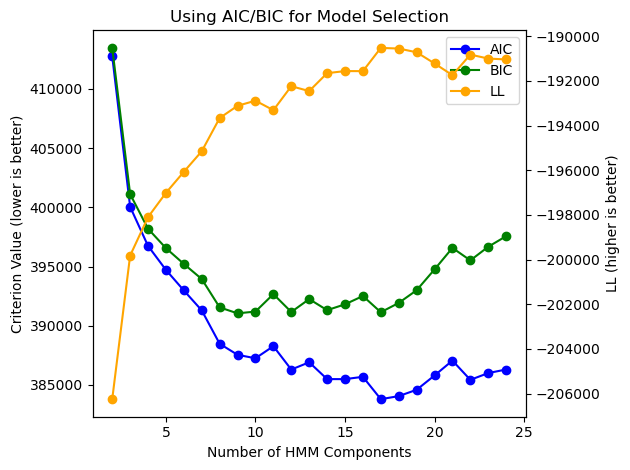

In [42]:

for n in ns:
    print('training models for: ', n)
    best_ll = None
    best_model = None
    for i in range(10):
        h = GaussianHMM(n, n_iter=200, tol=1e-4, random_state=rs)
        h.fit(np.concatenate(selected_train_features))
        score = h.score(np.concatenate(selected_val_features))
        if not best_ll or best_ll < best_ll:
            best_ll = score
            best_model = h
    aic_n, bic_n = calculate_aic_bic(best_model, np.concatenate(selected_val_features))
    aic.append(aic_n)
    bic.append(bic_n)
    lls.append(best_model.score(np.concatenate(selected_val_features)))
    print('completed models for: ', n)

fig, ax = plt.subplots()
ln1 = ax.plot(ns, aic, label="AIC", color="blue", marker="o")
ln2 = ax.plot(ns, bic, label="BIC", color="green", marker="o")
ax2 = ax.twinx()
ln3 = ax2.plot(ns, lls, label="LL", color="orange", marker="o")

ax.legend(handles=ax.lines + ax2.lines)
ax.set_title("Using AIC/BIC for Model Selection")
ax.set_ylabel("Criterion Value (lower is better)")
ax2.set_ylabel("LL (higher is better)")
ax.set_xlabel("Number of HMM Components")
fig.tight_layout()

plt.show()